In [246]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [354]:
df = pd.read_csv("Real estate.csv")
df.set_index("No", inplace = True)
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414 entries, 1 to 414
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 25.9 KB


In [174]:
df.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


## now that's we have a quick glimpse of our dataset, let's have a quick overview of the correlation of our dataset

In [62]:
df.corr()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
X1 transaction date,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2 house age,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


<AxesSubplot: >

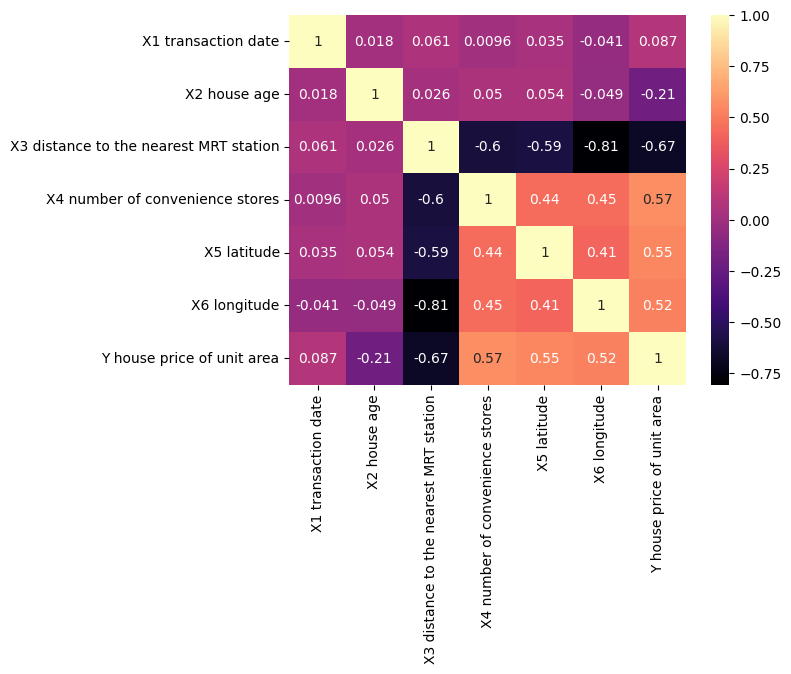

In [70]:
sns.heatmap(df.corr(), cmap = "magma", annot = True)

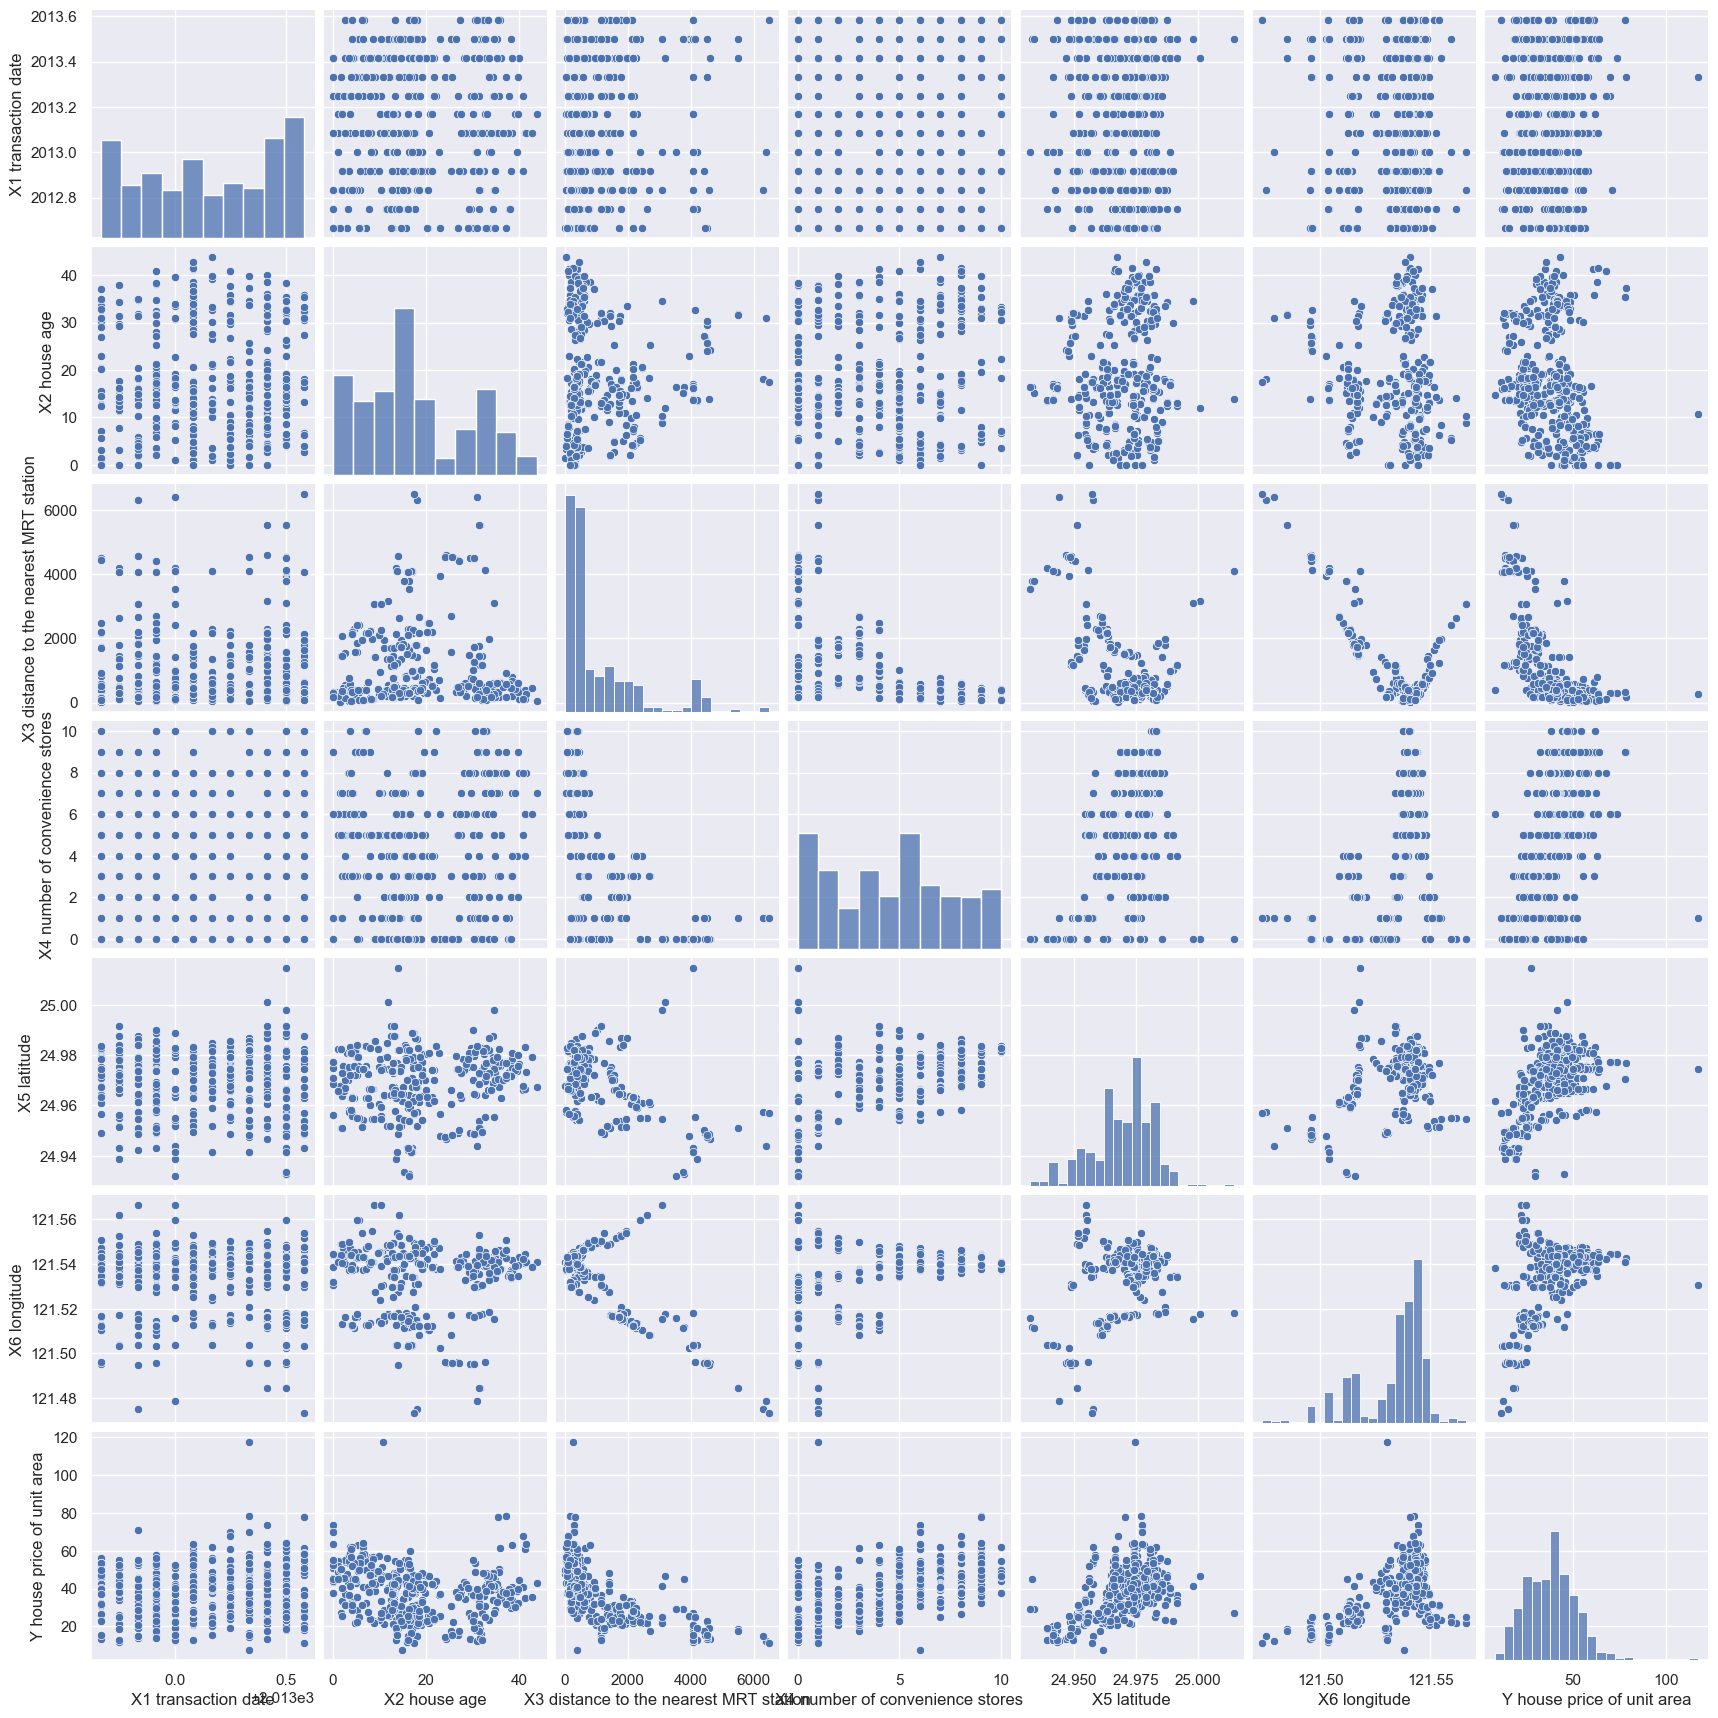

In [355]:
sns.pairplot(df)
plt.show()

## we notice that there are few outlier in our dataset, we have to clean that before we begin to analize

In [360]:
df = df.loc[df["Y house price of unit area"] < 85]
df = df.loc[df["X5 latitude"] < 25]
df = df.loc[df["X3 distance to the nearest MRT station"] < 5000]
df = df.loc[df["X6 longitude"] > 121.49]

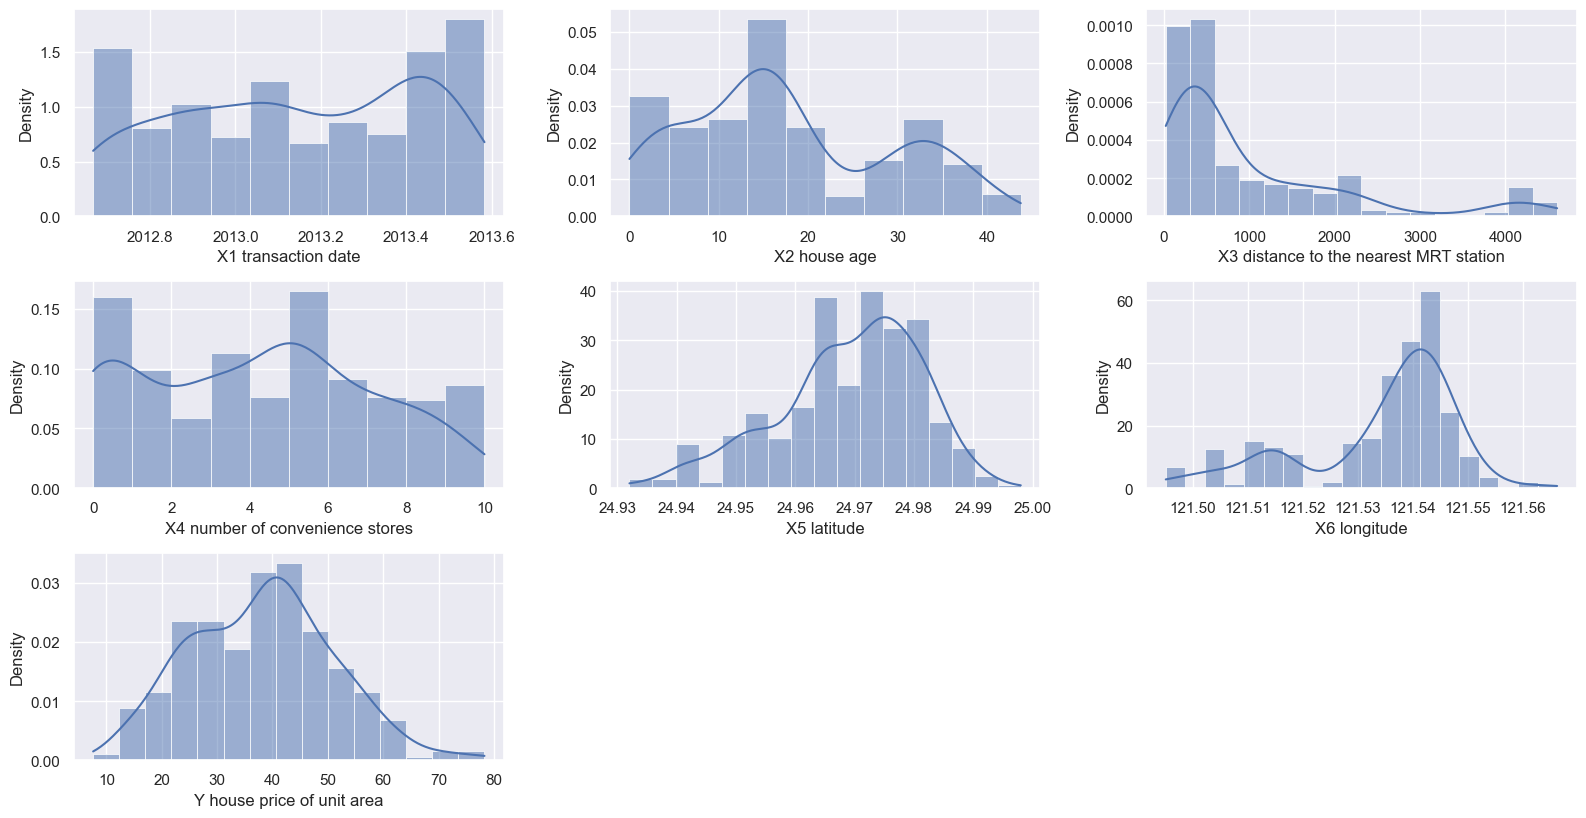

In [361]:
fig = plt.figure(figsize=(16,16))

for index,col in enumerate(df):
    plt.subplot(6,3,index+1)
    sns.histplot(df.loc[:,col].dropna(), kde=True, stat="density", linewidth=0.5);
fig.tight_layout(pad=1.0);

## now our dataset are ready to be analized!

In [362]:
X = df.drop("Y house price of unit area", axis = 1)
y = df["Y house price of unit area"]

In [363]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state  = 2)

In [364]:
clf = LinearRegression()

In [365]:
clf.fit(X_train,y_train)

LinearRegression()

In [366]:
pd.DataFrame(clf.coef_.T, X.columns, columns=['Coeficient'])

,Coeficient
X1 transaction date,4.760106
X2 house age,-0.267379
X3 distance to the nearest MRT station,-0.004354
X4 number of convenience stores,1.199556
X5 latitude,201.234833
X6 longitude,24.574331


In [378]:
y_pred = clf.predict(X_test)

In [379]:
R2 = r2_score(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

m = [R2, MAE,MSE,RMSE]
pd.DataFrame(m, index = ["R2","MAE","MSE","RMSE"], columns = ["Value"])

,Value
R2,0.670581
MAE,5.313564
MSE,49.441311
RMSE,7.031452


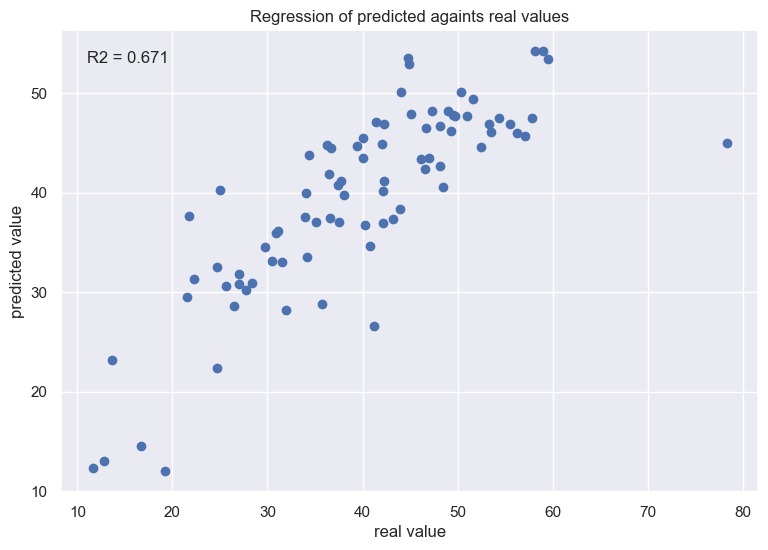

In [389]:
fig,ax = plt.subplots(1,1,figsize=(9,6))

plt.title("Regression of predicted againts real values")
plt.scatter(x=y_test.to_numpy(), y=y_pred)
plt.xlabel("real value")
plt.ylabel("predicted value")

plt.text(11,53,"R2 = {:.3f}".format(r2_score(y_test, y_pred)))

plt.show()

## With the R2 score of 67% we can use this dataset and the regression made to create an estimation of a certain real estate price with a decent accuracy